In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import VariationalLangFirsov_QEDCI as vlfqedci
import numpy as np


mol_str  = """
        Li 0 0 0 
        H 0 0 1.4
        symmetry c1
        """


# Set computation options
psi4_options = {'basis': 'sto-3g',
                  'scf_type': 'pk',
                  'e_convergence': 1e-12}

lambda_vector = np.array([0.0,0.0,0.05])



qedhf  = vlfqedci.QED_HF(mol_str=mol_str, psi_4_options_dict=psi4_options)
qedhf.qed_hf(lambda_vector=lambda_vector)










  Memory set to 476.837 MiB by Python driver.
Number of occupied orbitals:   2
Number of basis functions:   6

Size of the ERI tensor will be 0.00 GB.
C regular:  [[ 9.9085180e-01  1.8402036e-01  2.0698757e-01 -4.4997655e-18
  -3.6342886e-17  5.7585724e-02]
 [ 3.0868869e-02 -4.3604341e-01 -8.0449740e-01  3.2624066e-16
   4.3652561e-16 -7.8579747e-01]
 [-8.3670380e-03 -3.5314410e-01  6.1203155e-01  2.3548625e-16
  -3.0174348e-16 -1.0416882e+00]
 [ 4.8924238e-16  3.8680919e-17  9.2070775e-17  9.9980270e-01
   1.9863349e-02  3.7666440e-16]
 [-4.5610509e-17 -3.9840753e-17  3.2228385e-16 -1.9863349e-02
   9.9980270e-01  4.8220989e-16]
 [ 1.0592762e-02 -5.4085047e-01  1.2941833e-01 -4.5276024e-16
  -2.5900375e-16  1.2909723e+00]]
[-2.5270685e-16 -1.1670054e-16 -1.8971202e+00]

Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346237245145
CQED-RHF One-electron energy      = -12.7068118852694578
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy            

{'d_exp': np.float64(0.16094638935789787),
 'C': array([[-9.9084936e-01, -1.8375531e-01,  2.0744688e-01, -3.9083872e-17,
          7.2473027e-17, -5.6816221e-02],
        [-3.0814106e-02,  4.3351578e-01, -8.0906899e-01,  1.6708648e-16,
         -4.8124386e-16,  7.8249755e-01],
        [ 8.2549136e-03,  3.5264102e-01,  6.0633730e-01, -3.0886783e-16,
          3.5176551e-16,  1.0451836e+00],
        [ 3.6571262e-16,  1.6441366e-16,  4.5400801e-16,  2.5816581e-01,
         -9.6610062e-01, -1.9192796e-16],
        [-2.6659587e-17,  3.4282028e-16,  2.0405887e-16,  9.6610062e-01,
          2.5816581e-01,  3.2832152e-16],
        [-1.0740088e-02,  5.4297301e-01,  1.3480149e-01,  2.2937668e-17,
          2.4088118e-16, -1.2895284e+00]]),
 'C_reghf': array([[ 9.9085180e-01,  1.8402036e-01,  2.0698757e-01, -4.4997655e-18,
         -3.6342886e-17,  5.7585724e-02],
        [ 3.0868869e-02, -4.3604341e-01, -8.0449740e-01,  3.2624066e-16,
          4.3652561e-16, -7.8579747e-01],
        [-8.3670380

In [ ]:

import matplotlib.pyplot as plt

omega = .16
lambda_vector = np.array([0.0,0.0,0.04])


mol_str  = """
        Li 0 0 0 
        H 0 0 1.4
        symmetry c1
        """



# Set computation options
psi4_options = {'basis': 'sto-3g',
                  'scf_type': 'pk',
                  'e_convergence': 1e-12}


                  
options_dict = {"omega": omega,
                "photon_basis_size": 8,
                "lambda_vector": lambda_vector,
                "coherent_state": False,
                "reference_type": "qedhf"
                }


qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)


options_dict = {"excitation_level": 4,
                "num_active_electrons":4,
                "num_active_orbitals": 12}

vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)


cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
print('Total CI energy:   % 16.13f' % (cisd_mol_e))
print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

fully_photon_converged_1 = cisd_mol_e
fully_photon_converged_2 = cisd_mol_e_2
fully_photon_converged_3 = cisd_mol_e_3
fully_photon_converged_4 = cisd_mol_e_4


#CS
state_1 = []
state_2 = []
state_3 = []
state_4 = []

#PN
state_1_pn = []
state_2_pn = []
state_3_pn = []
state_4_pn = []

#VLF
state_1_vlf= []
state_2_vlf = []
state_3_vlf = []
state_4_vlf = []

#LF no opt
state_1_lf_noOpt= []
state_2_lf_noOpt = []
state_3_lf_noOpt = []
state_4_lf_noOpt = []


photon_number_states = []

for i in range(2,5):



    photon_number_states.append(i)

    options_dict = {"omega": omega,
                "photon_basis_size": i,
                "lambda_vector": lambda_vector,
                "coherent_state": True,
                "reference_type": "qedhf"
                }

    qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)

    options_dict = {"excitation_level": 4,
                    "num_active_electrons":4,
                    "num_active_orbitals": 12}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()


    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
    print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

    state_1.append(cisd_mol_e)
    state_2.append(cisd_mol_e_2)
    state_3.append(cisd_mol_e_3)
    state_4.append(cisd_mol_e_4)

    options_dict = {"omega": omega,
            "photon_basis_size": i,
            "lambda_vector": lambda_vector,
            "coherent_state": False,
            "reference_type": "qedhf"
            }

    qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict = options_dict)

    options_dict = {"excitation_level": 4,
                "num_active_electrons":4,
                "num_active_orbitals": 12}


    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
    print('CIcorrelation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

    state_1_pn.append(cisd_mol_e)
    state_2_pn.append(cisd_mol_e_2)
    state_3_pn.append(cisd_mol_e_3)
    state_4_pn.append(cisd_mol_e_4)


    options_dict = {"omega": omega,
    "photon_basis_size": i,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf",
    "excitation_level": 4,
    "num_active_electrons":4,
    "num_active_orbitals": 12,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }


    # qedci = vlfqedci.QED_CASCI_VLF(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)
    # qedci.grad_descent_VLF(n_epochs = 2, step_size = 1)
    # # print("HPF")
    # # print(H_CI.real)
    # vals = qedci.model.forward().detach().numpy()

    # # print(vecs)

    # cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    # cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    # cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    # cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    # state_1_vlf.append(cisd_mol_e)
    # state_2_vlf.append(cisd_mol_e_2)
    # state_3_vlf.append(cisd_mol_e_3)
    # state_4_vlf.append(cisd_mol_e_4)

    #     # print('# Determinants:      % 16d' % (len(detList)))
    # print('SCF energy:          % 16.13f' % (qedci.model.qedhf.QEDHF_E))
    # print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.model.qedhf.QEDHF_E))
    # print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    # print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    # print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))



    print("photon basis size : ", i)
    options_dict = {"omega": omega,
    "photon_basis_size": i,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 4,
    "num_active_electrons":4,
    "num_active_orbitals": 12,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }



    qedci = vlfqedci.QED_CASCI_VLF_NO_OPT(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)
    vals = qedci.get_energy().detach().numpy()
    print("vals: ", vals)

    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    state_1_lf_noOpt.append(cisd_mol_e)
    state_2_lf_noOpt.append(cisd_mol_e_2)
    state_3_lf_noOpt.append(cisd_mol_e_3)
    state_4_lf_noOpt.append(cisd_mol_e_4)

        # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.model.qedhf.QEDHF_E))
    print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.model.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))






state_1 = np.array(state_1) - fully_photon_converged_1
state_2 = np.array(state_2)- fully_photon_converged_2
state_3 = np.array(state_3)- fully_photon_converged_3
state_4 = np.array(state_4)- fully_photon_converged_4

state_1_pn = np.array(state_1_pn) - fully_photon_converged_1
state_2_pn = np.array(state_2_pn)- fully_photon_converged_2
state_3_pn = np.array(state_3_pn)- fully_photon_converged_3
state_4_pn = np.array(state_4_pn)- fully_photon_converged_4

# state_1_vlf = np.array(state_1_vlf) - fully_photon_converged_1
# state_2_vlf = np.array(state_2_vlf)- fully_photon_converged_2
# state_3_vlf = np.array(state_3_vlf)- fully_photon_converged_3
# state_4_vlf = np.array(state_4_vlf)- fully_photon_converged_4


state_1_lf_noOpt  = np.array(state_1_lf_noOpt ) - fully_photon_converged_1
state_2_lf_noOpt  = np.array(state_2_lf_noOpt )- fully_photon_converged_2
state_3_lf_noOpt  = np.array(state_3_lf_noOpt )- fully_photon_converged_3
state_4_lf_noOpt  = np.array(state_4_lf_noOpt )- fully_photon_converged_4


plt.plot(photon_number_states,state_1, label = "state_1_cs", color = 'red')
plt.plot(photon_number_states,state_2, label = "state_2_cs", color = 'green')
plt.plot(photon_number_states,state_3, label = "state_3_cs", color = 'blue')
plt.plot(photon_number_states,state_4, label = "state_4_cs", color = 'orange')

plt.plot(photon_number_states,state_1_pn, label = "state_1_pn", color = 'red', linestyle = 'dotted')
plt.plot(photon_number_states,state_2_pn, label = "state_2_pn", color = 'green', linestyle = 'dotted')
plt.plot(photon_number_states,state_3_pn, label = "state_3_pn", color = 'blue', linestyle = 'dotted')
plt.plot(photon_number_states,state_4_pn, label = "state_4_pn", color = 'orange', linestyle = 'dotted')


# plt.plot(photon_number_states,state_1_vlf, label = "state_1_vlf", color = 'red', linestyle = 'dashed')
# plt.plot(photon_number_states,state_2_vlf, label = "state_2_vlf", color = 'green', linestyle = 'dashed')
# plt.plot(photon_number_states,state_3_vlf, label = "state_3_vlf", color = 'blue', linestyle = 'dashed')
# plt.plot(photon_number_states,state_4_vlf, label = "state_4_vlf", color = 'orange', linestyle = 'dashed')

plt.plot(photon_number_states,state_1_lf_noOpt, label = "state_1_lf", color = 'red', linestyle = 'dashdot')
plt.plot(photon_number_states,state_2_lf_noOpt, label = "state_2_lf", color = 'green', linestyle = 'dashdot')
plt.plot(photon_number_states,state_3_lf_noOpt, label = "state_3_lf", color = 'blue', linestyle = 'dashdot')
plt.plot(photon_number_states,state_4_lf_noOpt, label = "state_4_lf", color = 'orange', linestyle = 'dashdot')



plt.legend()
plt.yscale("log")
plt.xlabel("Number of photon basis states")
plt.ylabel("Energy Convergence")
plt.title("Energy Convergence of CS and VLF Approaches vs Number of Photon Basis States, for HHe+ FCI sto-3g ground state")
plt.show()

NameError: name 'state_1' is not defined

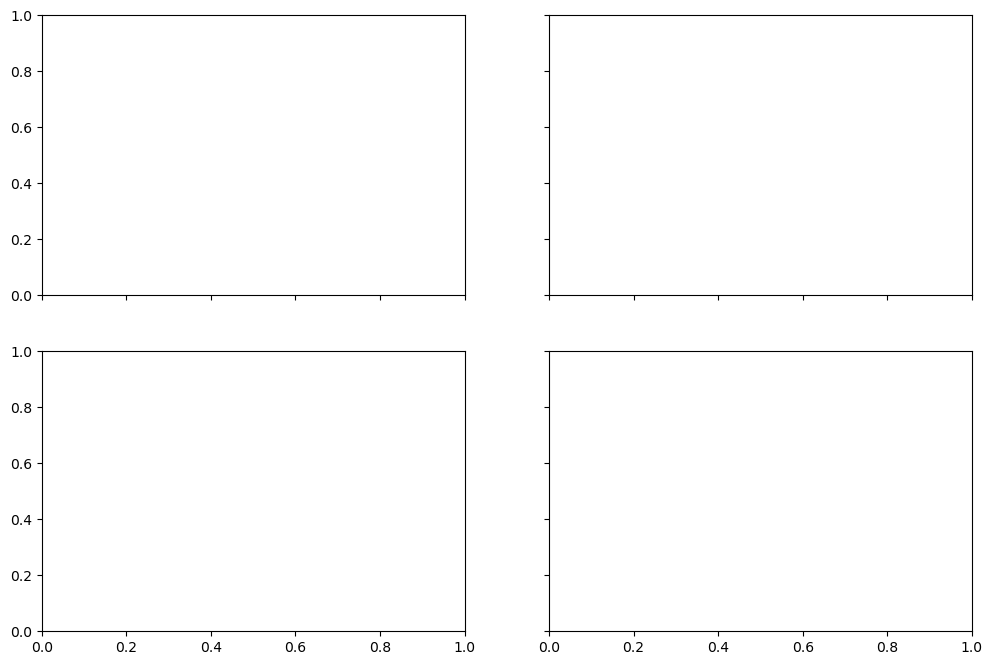

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind", 4)  # CS, PN, VLF

# Define common marker styles for each line
markers = ['o', 's', 'D', '^']

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# List of data for cleaner looping
state_data = [
    (state_1, state_1_pn, state_1_vlf, state_1_lf_noOpt,"State 1"),
    (state_2, state_2_pn, state_2_vlf, state_2_lf_noOpt, "State 2"),
    (state_3, state_3_pn, state_3_vlf, state_3_lf_noOpt,"State 3"),
    (state_4, state_4_pn, state_4_vlf, state_4_lf_noOpt, "State 4"),
]

for idx, ax in enumerate(axs.flat):

    cs, pn, vlf,lf, title = state_data[idx]

    ax.plot(photon_number_states, cs, label="CS", color=colors[0], marker=markers[0])
    ax.plot(photon_number_states, pn, label="PN", color=colors[1], marker=markers[1])
    # ax.plot(photon_number_states, vlf, label="VLF", color=colors[2], marker=markers[2])
    ax.plot(photon_number_states, lf, label="LF-DIP", color=colors[3], marker=markers[3])
    ax.set_title(title, fontsize=14)
    ax.set_yscale("log")
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Common axis labels
for ax in axs[1, :]:
    ax.set_xlabel("Number of Photon Basis States", fontsize=12)
for ax in axs[:, 0]:
    ax.set_ylabel("Energy Convergence", fontsize=12)

# Set uniform xticks
xticks = photon_number_states
for ax in axs.flat:
    ax.set_xticks(xticks)

# Put legend only once in the top-right plot
axs[0, 1].legend(fontsize=11, loc='best')

# Improve layout
fig.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

# Plot all three with markers and solid lines
ax.plot(photon_number_states, state_1, label="CS", color=colors[0], marker=markers[0])
ax.plot(photon_number_states, state_1_pn, label="PN", color=colors[1], marker=markers[1])
# ax.plot(photon_number_states, state_1_vlf, label="VLF", color=colors[2], marker=markers[2])
ax.plot(photon_number_states, state_1_lf_noOpt, label="LF-DIP", color=colors[3], marker=markers[3])

#ax.set_title("State 1", fontsize=14)
ax.set_yscale("log")
ax.set_xlabel("Number of Photon Basis States", fontsize=12)
ax.set_ylabel("Energy Convergence", fontsize=12)
ax.set_xticks(photon_number_states)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=11, loc='best')

fig.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

omega = .16
lambda_vector = np.array([0.0,0.0,0.04])


mol_str  = """
        Li 0 0 0 
        H 0 0 1.4
        symmetry c1
        """



# Set computation options
psi4_options = {'basis': 'sto-3g',
                  'scf_type': 'pk',
                  'e_convergence': 1e-12}


                  
options_dict = {"omega": omega,
                "photon_basis_size": 15,
                "lambda_vector": lambda_vector,
                "coherent_state": False,
                "reference_type": "qedhf"
                }


qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)


options_dict = {"excitation_level": 4,
                "num_active_electrons":4,
                "num_active_orbitals": 12}

vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)


cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
print('Total CI energy:   % 16.13f' % (cisd_mol_e))
print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

fully_photon_converged_1 = cisd_mol_e
fully_photon_converged_2 = cisd_mol_e_2
fully_photon_converged_3 = cisd_mol_e_3
fully_photon_converged_4 = cisd_mol_e_4


#CS
state_1 = []
state_2 = []
state_3 = []
state_4 = []

#PN
state_1_pn = []
state_2_pn = []
state_3_pn = []
state_4_pn = []

#VLF
state_1_vlf= []
state_2_vlf = []
state_3_vlf = []
state_4_vlf = []

#LF no opt
state_1_lf_noOpt= []
state_2_lf_noOpt = []
state_3_lf_noOpt = []
state_4_lf_noOpt = []


photon_number_states = []

for i in range(2,4):



    photon_number_states.append(i)

    options_dict = {"omega": omega,
                "photon_basis_size": i,
                "lambda_vector": lambda_vector,
                "coherent_state": True,
                "reference_type": "qedhf"
                }

    qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)

    options_dict = {"excitation_level": 4,
                    "num_active_electrons":4,
                    "num_active_orbitals": 12}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()


    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
    print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

    state_1.append(cisd_mol_e)
    state_2.append(cisd_mol_e_2)
    state_3.append(cisd_mol_e_3)
    state_4.append(cisd_mol_e_4)

    options_dict = {"omega": omega,
            "photon_basis_size": i,
            "lambda_vector": lambda_vector,
            "coherent_state": False,
            "reference_type": "qedhf"
            }

    qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict = options_dict)

    options_dict = {"excitation_level": 4,
                "num_active_electrons":4,
                "num_active_orbitals": 12}


    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
    print('CIcorrelation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

    state_1_pn.append(cisd_mol_e)
    state_2_pn.append(cisd_mol_e_2)
    state_3_pn.append(cisd_mol_e_3)
    state_4_pn.append(cisd_mol_e_4)


    options_dict = {"omega": omega,
    "photon_basis_size": i,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 4,
    "num_active_electrons":4,
    "num_active_orbitals": 12,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }


    qedci = vlfqedci.QED_CASCI_VLF(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)
    qedci.grad_descent_VLF(n_epochs = 2, step_size = 1)
    # print("HPF")
    # print(H_CI.real)
    vals = qedci.model.forward().detach().numpy()

    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    state_1_vlf.append(cisd_mol_e)
    state_2_vlf.append(cisd_mol_e_2)
    state_3_vlf.append(cisd_mol_e_3)
    state_4_vlf.append(cisd_mol_e_4)

        # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.model.qedhf.QEDHF_E))
    print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.model.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))



    print("photon basis size : ", i)
    options_dict = {"omega": omega,
    "photon_basis_size": i,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 4,
    "num_active_electrons":4,
    "num_active_orbitals": 12,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }



    qedci = vlfqedci.QED_CASCI_VLF_NO_OPT(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)
    vals = qedci.get_energy().detach().numpy()
    print("vals: ", vals)

    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    state_1_lf_noOpt.append(cisd_mol_e)
    state_2_lf_noOpt.append(cisd_mol_e_2)
    state_3_lf_noOpt.append(cisd_mol_e_3)
    state_4_lf_noOpt.append(cisd_mol_e_4)

        # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.model.qedhf.QEDHF_E))
    print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.model.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))






state_1 = np.array(state_1) - fully_photon_converged_1
state_2 = np.array(state_2)- fully_photon_converged_2
state_3 = np.array(state_3)- fully_photon_converged_3
state_4 = np.array(state_4)- fully_photon_converged_4

state_1_pn = np.array(state_1_pn) - fully_photon_converged_1
state_2_pn = np.array(state_2_pn)- fully_photon_converged_2
state_3_pn = np.array(state_3_pn)- fully_photon_converged_3
state_4_pn = np.array(state_4_pn)- fully_photon_converged_4

state_1_vlf = np.array(state_1_vlf) - fully_photon_converged_1
state_2_vlf = np.array(state_2_vlf)- fully_photon_converged_2
state_3_vlf = np.array(state_3_vlf)- fully_photon_converged_3
state_4_vlf = np.array(state_4_vlf)- fully_photon_converged_4


state_1_lf_noOpt  = np.array(state_1_lf_noOpt ) - fully_photon_converged_1
state_2_lf_noOpt  = np.array(state_2_lf_noOpt )- fully_photon_converged_2
state_3_lf_noOpt  = np.array(state_3_lf_noOpt )- fully_photon_converged_3
state_4_lf_noOpt  = np.array(state_4_lf_noOpt )- fully_photon_converged_4


plt.plot(photon_number_states,state_1, label = "state_1_cs", color = 'red')
plt.plot(photon_number_states,state_2, label = "state_2_cs", color = 'green')
plt.plot(photon_number_states,state_3, label = "state_3_cs", color = 'blue')
plt.plot(photon_number_states,state_4, label = "state_4_cs", color = 'orange')

plt.plot(photon_number_states,state_1_pn, label = "state_1_pn", color = 'red', linestyle = 'dotted')
plt.plot(photon_number_states,state_2_pn, label = "state_2_pn", color = 'green', linestyle = 'dotted')
plt.plot(photon_number_states,state_3_pn, label = "state_3_pn", color = 'blue', linestyle = 'dotted')
plt.plot(photon_number_states,state_4_pn, label = "state_4_pn", color = 'orange', linestyle = 'dotted')


plt.plot(photon_number_states,state_1_vlf, label = "state_1_vlf", color = 'red', linestyle = 'dashed')
plt.plot(photon_number_states,state_2_vlf, label = "state_2_vlf", color = 'green', linestyle = 'dashed')
plt.plot(photon_number_states,state_3_vlf, label = "state_3_vlf", color = 'blue', linestyle = 'dashed')
plt.plot(photon_number_states,state_4_vlf, label = "state_4_vlf", color = 'orange', linestyle = 'dashed')

plt.plot(photon_number_states,state_1_lf_noOpt, label = "state_1_lf", color = 'red', linestyle = 'dashdot')
plt.plot(photon_number_states,state_2_lf_noOpt, label = "state_2_lf", color = 'green', linestyle = 'dashdot')
plt.plot(photon_number_states,state_3_lf_noOpt, label = "state_3_lf", color = 'blue', linestyle = 'dashdot')
plt.plot(photon_number_states,state_4_lf_noOpt, label = "state_4_lf", color = 'orange', linestyle = 'dashdot')



plt.legend()
plt.yscale("log")
plt.xlabel("Number of photon basis states")
plt.ylabel("Energy Convergence")
plt.title("Energy Convergence of CS and VLF Approaches vs Number of Photon Basis States, for HHe+ FCI sto-3g ground state")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind", 4)  # CS, PN, VLF

# Define common marker styles for each line
markers = ['o', 's', 'D', '^']

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# List of data for cleaner looping
state_data = [
    (state_1, state_1_pn, state_1_vlf, state_1_lf_noOpt,"State 1"),
    (state_2, state_2_pn, state_2_vlf, state_2_lf_noOpt, "State 2"),
    (state_3, state_3_pn, state_3_vlf, state_3_lf_noOpt,"State 3"),
    (state_4, state_4_pn, state_4_vlf, state_4_lf_noOpt, "State 4"),
]

for idx, ax in enumerate(axs.flat):

    cs, pn, vlf,lf, title = state_data[idx]

    ax.plot(photon_number_states, cs, label="CS", color=colors[0], marker=markers[0])
    ax.plot(photon_number_states, pn, label="PN", color=colors[1], marker=markers[1])
    ax.plot(photon_number_states, vlf, label="VLF", color=colors[2], marker=markers[2])
    ax.plot(photon_number_states, lf, label="LF-DIP", color=colors[3], marker=markers[3])
    ax.set_title(title, fontsize=14)
    ax.set_yscale("log")
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Common axis labels
for ax in axs[1, :]:
    ax.set_xlabel("Number of Photon Basis States", fontsize=12)
for ax in axs[:, 0]:
    ax.set_ylabel("Energy Convergence", fontsize=12)

# Set uniform xticks
xticks = photon_number_states
for ax in axs.flat:
    ax.set_xticks(xticks)

# Put legend only once in the top-right plot
axs[0, 1].legend(fontsize=11, loc='best')

# Improve layout
fig.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

# Plot all three with markers and solid lines
ax.plot(photon_number_states, state_1, label="CS", color=colors[0], marker=markers[0])
ax.plot(photon_number_states, state_1_pn, label="PN", color=colors[1], marker=markers[1])
ax.plot(photon_number_states, state_1_vlf, label="VLF", color=colors[2], marker=markers[2])
ax.plot(photon_number_states, state_1_lf_noOpt, label="LF-DIP", color=colors[3], marker=markers[3])

#ax.set_title("State 1", fontsize=14)
ax.set_yscale("log")
ax.set_xlabel("Number of Photon Basis States", fontsize=12)
ax.set_ylabel("Energy Convergence", fontsize=12)
ax.set_xticks(photon_number_states)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=11, loc='best')

fig.tight_layout()
plt.show()


In [ ]:
num_lambdas  = 20
lambda_z_vals =  np.linspace(0.0, 1, num_lambdas)


#don't really need pn and cs only need pn because they are the same
pn_lambda_range_state_0 = []
vlf_lambda_range_state_0 = []
lf_dip_lambda_range_state_0 = []

pn_conv_lambda_range_state_0 = []


for i in range(0, num_lambdas):


    lambda_vec_temp  = np.array([0.0,0.0, lambda_z_vals[i]])
    print("lambda vec: ", lambda_vec_temp)

    photon_number_states.append(i)

    options_dict = {"omega": omega,
                "photon_basis_size": 2,
                "lambda_vector": lambda_vec_temp,
                "coherent_state": False,
                "reference_type": "qedhf"
                }

    qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()


    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
    print('CI correlation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

    pn_lambda_range_state_0.append(cisd_mol_e)


    options_dict = {"omega": omega,
            "photon_basis_size": 10,
            "lambda_vector": lambda_vec_temp,
            "coherent_state": False,
            "reference_type": "qedhf"
            }

    qedci = vlfqedci.CASCI(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict = options_dict)

    options_dict = {"excitation_level": 2,
                "num_active_electrons":2,
                "num_active_orbitals": 8}


    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    # print('# Determinants:      % 16d' % (len(detList)))
    print('SCF energy:          % 16.13f' % (qedci.qedhf.QEDHF_E))
    print('CIcorrelation:    % 16.13f' % (cisd_mol_e - qedci.qedhf.QEDHF_E))
    print('Total CI energy:   % 16.13f' % (cisd_mol_e))
    print('Total CI energy state 2:   % 16.13f' % (cisd_mol_e_2))
    print('Total CI energy state 3:   % 16.13f' % (cisd_mol_e_3))

    pn_conv_lambda_range_state_0.append(cisd_mol_e)



    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": lambda_vec_temp,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 2,
    "num_active_electrons":2,
    "num_active_orbitals": 8,
    "minimization_list": [0],
    "lf_param_guess": None
    }


    qedci = vlfqedci.QED_CASCI_VLF(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)
    qedci.grad_descent_VLF(n_epochs = 2, step_size = 1)
    # print("HPF")
    # print(H_CI.real)
    vals = qedci.model.forward().detach().numpy()

    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    vlf_lambda_range_state_0.append(cisd_mol_e)



    print("photon basis size : ", i)
    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": lambda_vec_temp,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 2,
    "num_active_electrons":2,
    "num_active_orbitals": 8,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }



    qedci = vlfqedci.QED_CASCI_VLF_NO_OPT(mol_str=mol_str, psi4_options_dict=psi4_options, options_dict=options_dict)
    vals = qedci.get_energy().detach().numpy()
    print("vals: ", vals)

    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    lf_dip_lambda_range_state_0.append(cisd_mol_e)



plt.plot(lf_dip_lambda_range_state_0, color = "darkorange")
plt.plot(vlf_lambda_range_state_0, color  ="green")
plt.plot(pn_lambda_range_state_0, color = "red")
plt.plot(pn_conv_lambda_range_state_0, color = "black")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Set publication-quality figure size and resolution
plt.figure(figsize=(8, 6), dpi=300)

# Plot with open-face markers
plt.plot(
    lambda_z_vals,
    lf_dip_lambda_range_state_0,
    label="LF Dip",
    color="darkorange",
    linewidth=2,
    marker='o',
    markersize=5,
    markerfacecolor='none',
    markeredgewidth=1.5
)

plt.plot(
    lambda_z_vals,
    vlf_lambda_range_state_0,
    label="VLF",
    color="green",
    linewidth=2,
    marker='s',
    markersize=5,
    markerfacecolor='none',
    markeredgewidth=1.5
)

plt.plot(
    lambda_z_vals,
    pn_lambda_range_state_0,
    label="PN",
    color="red",
    linewidth=2,
    marker='^',
    markersize=5,
    markerfacecolor='none',
    markeredgewidth=1.5
)

plt.plot(
    lambda_z_vals,
    pn_conv_lambda_range_state_0,
    label="PN Conv",
    color="black",
    linewidth=2,
    marker='D',
    markersize=5,
    markerfacecolor='none',
    markeredgewidth=1.5
)

# Axis labels and title
plt.title("Lambda Range Analysis - State 0", fontsize=14)
plt.xlabel("Coupling Strength (a.u.)", fontsize=12)
plt.ylabel("Energy (Hartree)", fontsize=12)

# Legend
plt.legend(fontsize=10, loc="best")

# Axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# L



In [ ]:
import matplotlib.pyplot as plt

mol_str  = """
        H 0 0 0 
        H 0 0 **R**
        symmetry c1
        """


# Set computation options
psi4_options = {'basis': '6-31g',
                'scf_type': 'pk',
                'e_convergence': 1e-12}

num_bondlengthscans = 50
bondlengths = np.linspace(0.5, 1.15 , num_bondlengthscans)


d_exps_CS = []
d_exps_PN = []

#these are FCI CS
CI_ground = []
CI_ex_1 = []
CI_ex_2 = []
CI_ex_3 = []
CI_ex_4 = []


#these are FCI PN
CI_ground_PN = []
CI_ex_1_PN = []
CI_ex_2_PN = []
CI_ex_3_PN = []
CI_ex_4_PN = []


#these are FCI PN converged
CI_ground_PNCONV = []
CI_ex_1_PNCONV = []
CI_ex_2_PNCONV = []
CI_ex_3_PNCONV = []
CI_ex_4_PNCONV = []


#these are CAS
CI_ground_nocoup = []
CI_ex_1_nocoup = []
CI_ex_2_nocoup = []
CI_ex_3_nocoup = []
CI_ex_4_nocoup = []



for i in range(0,num_bondlengthscans):

    mol = mol_str.replace('**R**', str(bondlengths[i]))

    print(mol)

    options_dict = {"omega": omega,
            "photon_basis_size": 2,
            "lambda_vector": lambda_vector,
            "coherent_state": True,
            "reference_type": "qedhf"
            }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )
    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    d_exps_CS.append(qedci.qedhf.d_exp)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground.append(cisd_mol_e)
    CI_ex_1.append(cisd_mol_e_2)
    CI_ex_2.append(cisd_mol_e_3)
    CI_ex_3.append(cisd_mol_e_4)
    CI_ex_4.append(cisd_mol_e_5)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
        "photon_basis_size": 2,
        "lambda_vector": lambda_vector,
        "coherent_state": False,
        "reference_type": "qedhf"
        }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )


    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}


    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_PN.append(cisd_mol_e)
    CI_ex_1_PN.append(cisd_mol_e_2)
    CI_ex_2_PN.append(cisd_mol_e_3)
    CI_ex_3_PN.append(cisd_mol_e_4)
    CI_ex_4_PN.append(cisd_mol_e_5)

    d_exps_PN.append(qedci.qedhf.d_exp)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
    "photon_basis_size": 8,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf"
    }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict = options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_PNCONV.append(cisd_mol_e)
    CI_ex_1_PNCONV.append(cisd_mol_e_2)
    CI_ex_2_PNCONV.append(cisd_mol_e_3)
    CI_ex_3_PNCONV.append(cisd_mol_e_4)
    CI_ex_4_PNCONV.append(cisd_mol_e_5)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": np.array([0.0,0.0,0.00]),
    "coherent_state": True,
    "reference_type": "qedhf"
    }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options,  options_dict=options_dict )

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_nocoup.append(cisd_mol_e)
    CI_ex_1_nocoup.append(cisd_mol_e_2)
    CI_ex_2_nocoup.append(cisd_mol_e_3)
    CI_ex_3_nocoup.append(cisd_mol_e_4)
    CI_ex_4_nocoup.append(cisd_mol_e_5)



plt.plot(bondlengths, CI_ground, color = 'red')
plt.plot(bondlengths, CI_ex_1, color = 'green')
plt.plot(bondlengths, CI_ex_2, color = 'blue')
plt.plot(bondlengths, CI_ex_3, color = 'yellow')
plt.plot(bondlengths, CI_ex_4, color = 'orange')


plt.plot(bondlengths, CI_ground_nocoup, color = 'red',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_1_nocoup, color = 'green',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_2_nocoup, color = 'blue',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_3_nocoup, color = 'yellow',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_4_nocoup, color = 'orange',linestyle ='dashed')

plt.show()






plt.plot(bondlengths, CI_ex_2_PNCONV, color = 'black')
plt.plot(bondlengths, CI_ex_3_PNCONV, color = 'black')



plt.plot(bondlengths, CI_ex_2_PN, color = 'red')
plt.plot(bondlengths, CI_ex_3_PN, color = 'red')



# plt.plot(bondlengths, CI_ground, color = 'red')
# plt.plot(bondlengths, CI_ex_1, color = 'green')
plt.plot(bondlengths, CI_ex_2, color = 'blue')
plt.plot(bondlengths, CI_ex_3, color = 'blue')
# plt.plot(bondlengths, CI_ex_4, color = 'orange')


# plt.plot(bondlengths, CI_ground_nocoup, color = 'red',linestyle ='dashed')
# plt.plot(bondlengths, CI_ex_1_nocoup, color = 'green',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_2_nocoup, color = 'purple',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_3_nocoup, color = 'purple',linestyle ='dashed')
# plt.plot(bondlengths, CI_ex_4_nocoup, color = 'orange',linestyle ='dashed')

plt.show()


plt.plot(d_exps_CS, color = 'purple',linestyle ='dashed')
plt.plot(d_exps_PN, color = 'red',linestyle ='dashed')
plt.show()

In [ ]:
import matplotlib.pyplot as plt


mol_str  = """
        H 0 0 0 
        H 0 0 **R**
        symmetry c1
        """


# Set computation options
psi4_options = {'basis': '6-31g',
                'scf_type': 'pk',
                'e_convergence': 1e-12}

                

#these are FCI CS
CI_ground = []
CI_ex_1 = []
CI_ex_2 = []
CI_ex_3 = []
CI_ex_4 = []


#these are FCI PN
CI_ground_PN = []
CI_ex_1_PN = []
CI_ex_2_PN = []
CI_ex_3_PN = []
CI_ex_4_PN = []


#these are FCI PN converged
CI_ground_PNCONV = []
CI_ex_1_PNCONV = []
CI_ex_2_PNCONV = []
CI_ex_3_PNCONV = []
CI_ex_4_PNCONV = []


#these are FCI no coupling
CI_ground_nocoup = []
CI_ex_1_nocoup = []
CI_ex_2_nocoup = []
CI_ex_3_nocoup = []
CI_ex_4_nocoup = []


#these are FCI VLF
CI_ground_VLF = []
CI_ex_1_VLF = []
CI_ex_2_VLF = []
CI_ex_3_VLF  = []
CI_ex_4_VLF = []


for i in range(0,num_bondlengthscans):

    mol = mol_str.replace('**R**', str(bondlengths[i]))

    print(mol)

    options_dict = {"omega": omega,
            "photon_basis_size": 2,
            "lambda_vector": lambda_vector,
            "coherent_state": True,
            "reference_type": "qedhf"
            }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )
    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    d_exps_CS.append(qedci.qedhf.d_exp)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground.append(cisd_mol_e)
    CI_ex_1.append(cisd_mol_e_2)
    CI_ex_2.append(cisd_mol_e_3)
    CI_ex_3.append(cisd_mol_e_4)
    CI_ex_4.append(cisd_mol_e_5)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
        "photon_basis_size": 2,
        "lambda_vector": lambda_vector,
        "coherent_state": False,
        "reference_type": "qedhf"
        }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )


    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}


    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_PN.append(cisd_mol_e)
    CI_ex_1_PN.append(cisd_mol_e_2)
    CI_ex_2_PN.append(cisd_mol_e_3)
    CI_ex_3_PN.append(cisd_mol_e_4)
    CI_ex_4_PN.append(cisd_mol_e_5)

    d_exps_PN.append(qedci.qedhf.d_exp)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
    "photon_basis_size": 8,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole"
    }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict = options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_PNCONV.append(cisd_mol_e)
    CI_ex_1_PNCONV.append(cisd_mol_e_2)
    CI_ex_2_PNCONV.append(cisd_mol_e_3)
    CI_ex_3_PNCONV.append(cisd_mol_e_4)
    CI_ex_4_PNCONV.append(cisd_mol_e_5)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": np.array([0.0,0.0,0.00]),
    "coherent_state": True,
    "reference_type": "qedhf_dipole"
    }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options,  options_dict=options_dict )

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_nocoup.append(cisd_mol_e)
    CI_ex_1_nocoup.append(cisd_mol_e_2)
    CI_ex_2_nocoup.append(cisd_mol_e_3)
    CI_ex_3_nocoup.append(cisd_mol_e_4)
    CI_ex_4_nocoup.append(cisd_mol_e_5)




    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 2,
    "num_active_electrons":2,
    "num_active_orbitals": 8,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }



    qedci = vlfqedci.QED_CASCI_VLF(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict)
    qedci.grad_descent_VLF(n_epochs = 2, step_size = 1)
    # print("HPF")
    # print(H_CI.real)
    vals = qedci.model.forward().detach().numpy()

    for i in range(0,20):
        print("\n")
    print(vals)
    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_VLF.append(cisd_mol_e)
    CI_ex_1_VLF.append(cisd_mol_e_2)
    CI_ex_2_VLF.append(cisd_mol_e_3)
    CI_ex_3_VLF.append(cisd_mol_e_4)
    CI_ex_4_VLF.append(cisd_mol_e_5)


In [ ]:
print(qedci.model.d_mo)

In [ ]:
plt.plot(bondlengths, CI_ground, color = 'red')
plt.plot(bondlengths, CI_ex_1, color = 'green')
plt.plot(bondlengths, CI_ex_2, color = 'blue')
plt.plot(bondlengths, CI_ex_3, color = 'yellow')
plt.plot(bondlengths, CI_ex_4, color = 'orange')


plt.plot(bondlengths, CI_ground_nocoup, color = 'red',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_1_nocoup, color = 'green',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_2_nocoup, color = 'blue',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_3_nocoup, color = 'yellow',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_4_nocoup, color = 'orange',linestyle ='dashed')

plt.show()






plt.plot(bondlengths, CI_ex_2_PNCONV, color = 'black')
plt.plot(bondlengths, CI_ex_3_PNCONV, color = 'black')



plt.plot(bondlengths, CI_ex_2_PN, color = 'red')
plt.plot(bondlengths, CI_ex_3_PN, color = 'red')

plt.plot(bondlengths, CI_ex_2_VLF, color = 'green')
plt.plot(bondlengths, CI_ex_3_VLF, color = 'green')



# plt.plot(bondlengths, CI_ground, color = 'red')
# plt.plot(bondlengths, CI_ex_1, color = 'green')
plt.plot(bondlengths, CI_ex_2, color = 'blue')
plt.plot(bondlengths, CI_ex_3, color = 'blue')
# plt.plot(bondlengths, CI_ex_4, color = 'orange')


# plt.plot(bondlengths, CI_ground_nocoup, color = 'red',linestyle ='dashed')
# plt.plot(bondlengths, CI_ex_1_nocoup, color = 'green',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_2_nocoup, color = 'purple',linestyle ='dashed')
plt.plot(bondlengths, CI_ex_3_nocoup, color = 'purple',linestyle ='dashed')
# plt.plot(bondlengths, CI_ex_4_nocoup, color = 'orange',linestyle ='dashed')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', markersize =8 )
plt.plot(bondlengths, CI_ex_3_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged', markersize =8)

# PN (red)
plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', markersize =8)
plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN', markersize =8)

# VLF (green)
plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', markersize =6)
plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF', markersize =6)

# Bare CI (blue)
plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white',  markersize =6)
plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS', markersize =6)

# No coupling (purple dashed)
plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', markersize =5 )
plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling', markersize =5)

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# # PN (red)
# plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white')
# plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# # VLF (green)
# plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white')
# plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# # Bare CI (blue)
# plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# No coupling (purple dashed)
plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# PN (red)
plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# VLF (green)
plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# Bare CI (blue)
plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', )
plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# # No coupling (purple dashed)
# plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()




import matplotlib.pyplot as plt
import numpy as np

# Compute errors for each method relative to PNCONV (reference)
error_CS_2 = np.abs(np.array(CI_ex_2) - np.array(CI_ex_2_PNCONV))
error_CS_3 = np.abs(np.array(CI_ex_3) - np.array(CI_ex_3_PNCONV))

error_PN_2 = np.abs(np.array(CI_ex_2_PN) - np.array(CI_ex_2_PNCONV))
error_PN_3 = np.abs(np.array(CI_ex_3_PN) - np.array(CI_ex_3_PNCONV))

error_VLF_2 = np.abs(np.array(CI_ex_2_VLF) - np.array(CI_ex_2_PNCONV))
error_VLF_3 = np.abs(np.array(CI_ex_3_VLF) - np.array(CI_ex_3_PNCONV))

# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths, error_CS_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths, error_PN_2, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths, error_VLF_2, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')

# Upper polariton (labeled '3')
plt.plot(bondlengths, error_CS_3, color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths, error_PN_3, color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths, error_VLF_3, color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')

# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)

plt.legend(fontsize=10, loc='upper left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths, error_CS_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths, error_PN_2, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths, error_VLF_2, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')

# Upper polariton (labeled '3')
plt.plot(bondlengths, error_CS_3, color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths, error_PN_3, color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths, error_VLF_3, color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')

# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)


# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, ncol=1)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right

plt.legend(fontsize=10, loc='lower left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.yscale("log")
plt.show()

In [ ]:
import matplotlib.pyplot as plt


mol_str  = """
        H 0 0 0 
        H 0 0 **R**
        symmetry c1
        """


# Set computation options
psi4_options = {'basis': '6-31g',
                'scf_type': 'pk',
                'e_convergence': 1e-12}

                

#these are FCI CS
CI_ground_noOpt = []
CI_ex_1_noOpt = []
CI_ex_2_noOpt = []
CI_ex_3_noOpt = []
CI_ex_4_noOpt = []


#these are FCI PN
CI_ground_PN_noOpt = []
CI_ex_1_PN_noOpt = []
CI_ex_2_PN_noOpt = []
CI_ex_3_PN_noOpt = []
CI_ex_4_PN_noOpt = []


#these are FCI PN converged
CI_ground_PNCONV_noOpt = []
CI_ex_1_PNCONV_noOpt = []
CI_ex_2_PNCONV_noOpt = []
CI_ex_3_PNCONV_noOpt = []
CI_ex_4_PNCONV_noOpt = []


#these are FCI no coupling
CI_ground_nocoup_noOpt = []
CI_ex_1_nocoup_noOpt = []
CI_ex_2_nocoup_noOpt= []
CI_ex_3_nocoup_noOpt = []
CI_ex_4_nocoup_noOpt = []


#these are FCI VLF
CI_ground_VLF_noOpt = []
CI_ex_1_VLF_noOpt = []
CI_ex_2_VLF_noOpt = []
CI_ex_3_VLF_noOpt  = []
CI_ex_4_VLF_noOpt = []


for i in range(0,num_bondlengthscans):

    mol = mol_str.replace('**R**', str(bondlengths[i]))

    print(mol)

    options_dict = {"omega": omega,
            "photon_basis_size": 2,
            "lambda_vector": lambda_vector,
            "coherent_state": True,
            "reference_type": "qedhf"
            }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )
    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    d_exps_CS.append(qedci.qedhf.d_exp)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_noOpt.append(cisd_mol_e)
    CI_ex_1_noOpt.append(cisd_mol_e_2)
    CI_ex_2_noOpt.append(cisd_mol_e_3)
    CI_ex_3_noOpt.append(cisd_mol_e_4)
    CI_ex_4_noOpt.append(cisd_mol_e_5)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
        "photon_basis_size": 2,
        "lambda_vector": lambda_vector,
        "coherent_state": False,
        "reference_type": "qedhf"
        }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )


    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}


    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_PN_noOpt.append(cisd_mol_e)
    CI_ex_1_PN_noOpt.append(cisd_mol_e_2)
    CI_ex_2_PN_noOpt.append(cisd_mol_e_3)
    CI_ex_3_PN_noOpt.append(cisd_mol_e_4)
    CI_ex_4_PN_noOpt.append(cisd_mol_e_5)

    d_exps_PN.append(qedci.qedhf.d_exp)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
    "photon_basis_size": 8,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole"
    }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict )

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict = options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_PNCONV_noOpt.append(cisd_mol_e)
    CI_ex_1_PNCONV_noOpt.append(cisd_mol_e_2)
    CI_ex_2_PNCONV_noOpt.append(cisd_mol_e_3)
    CI_ex_3_PNCONV_noOpt.append(cisd_mol_e_4)
    CI_ex_4_PNCONV_noOpt.append(cisd_mol_e_5)


    mol = mol_str.replace('**R**', str(bondlengths[i]))

    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": np.array([0.0,0.0,0.00]),
    "coherent_state": True,
    "reference_type": "qedhf_dipole"
    }

    qedci = vlfqedci.CASCI(mol_str=mol, psi4_options_dict=psi4_options,  options_dict=options_dict )

    options_dict = {"excitation_level": 2,
                    "num_active_electrons":2,
                    "num_active_orbitals": 8}

    vals, vecs, H_CI = qedci.calculate_CI_energy(options_dict=options_dict)

    cisd_mol_e = vals[0] + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_5 = vals[4]  + qedci.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_nocoup_noOpt.append(cisd_mol_e)
    CI_ex_1_nocoup_noOpt.append(cisd_mol_e_2)
    CI_ex_2_nocoup_noOpt.append(cisd_mol_e_3)
    CI_ex_3_nocoup_noOpt.append(cisd_mol_e_4)
    CI_ex_4_nocoup_noOpt.append(cisd_mol_e_5)




    options_dict = {"omega": omega,
    "photon_basis_size": 2,
    "lambda_vector": lambda_vector,
    "coherent_state": True,
    "reference_type": "qedhf_dipole",
    "excitation_level": 2,
    "num_active_electrons":2,
    "num_active_orbitals": 8,
    "minimization_list": [0,1,2,3],
    "lf_param_guess": None
    }



    qedci = vlfqedci.QED_CASCI_VLF_NO_OPT(mol_str=mol, psi4_options_dict=psi4_options, options_dict=options_dict)
    vals = qedci.get_energy().detach().numpy()
    print("vals: ", vals)

    for i in range(0,20):
        print("\n")
    print(vals)
    # print(vecs)

    cisd_mol_e = vals[0] + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_2 = vals[1]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_3 = vals[2]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()
    cisd_mol_e_4 = vals[3]  + qedci.model.qedhf.mol.nuclear_repulsion_energy()

    CI_ground_VLF_noOpt.append(cisd_mol_e)
    CI_ex_1_VLF_noOpt.append(cisd_mol_e_2)
    CI_ex_2_VLF_noOpt.append(cisd_mol_e_3)
    CI_ex_3_VLF_noOpt.append(cisd_mol_e_4)
    CI_ex_4_VLF_noOpt.append(cisd_mol_e_5)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV_noOpt, color='black', linestyle='-', marker='^', markerfacecolor='white', markersize =8 )
plt.plot(bondlengths, CI_ex_3_PNCONV_noOpt, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged', markersize =8)

# PN (red)
plt.plot(bondlengths, CI_ex_2_PN_noOpt, color='red', linestyle='-', marker='d', markerfacecolor='white', markersize =8)
plt.plot(bondlengths, CI_ex_3_PN_noOpt, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN', markersize =8)

# VLF (green)
plt.plot(bondlengths, CI_ex_2_VLF_noOpt, color='green', linestyle='-', marker='o', markerfacecolor='white', markersize =6)
plt.plot(bondlengths, CI_ex_3_VLF_noOpt, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF', markersize =6)

# Bare CI (blue)
plt.plot(bondlengths, CI_ex_2_noOpt, color='blue', linestyle='-', marker='s', markerfacecolor='white',  markersize =6)
plt.plot(bondlengths, CI_ex_3_noOpt, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS', markersize =6)

# No coupling (purple dashed)
plt.plot(bondlengths, CI_ex_2_nocoup_noOpt, color='purple', linestyle='--', marker='v', markerfacecolor='white', markersize =5 )
plt.plot(bondlengths, CI_ex_3_nocoup_noOpt, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling', markersize =5)

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV_noOpt, color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PNCONV_noOpt, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# No coupling (purple dashed)
plt.plot(bondlengths, CI_ex_2_nocoup_noOpt, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
plt.plot(bondlengths, CI_ex_3_nocoup_noOpt, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV_noOpt, color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PNCONV_noOpt, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# PN (red)
plt.plot(bondlengths, CI_ex_2_PN_noOpt, color='red', linestyle='-', marker='d', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PN_noOpt, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# VLF (green)
plt.plot(bondlengths, CI_ex_2_VLF_noOpt, color='green', linestyle='-', marker='o', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_VLF_noOpt, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# Bare CI (blue)
plt.plot(bondlengths, CI_ex_2_noOpt, color='blue', linestyle='-', marker='s', markerfacecolor='white', )
plt.plot(bondlengths, CI_ex_3_noOpt, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# # No coupling (purple dashed)
# plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()




import matplotlib.pyplot as plt
import numpy as np

# Compute errors for each method relative to PNCONV (reference)
error_CS_2_noOpt = np.abs(np.array(CI_ex_2_noOpt) - np.array(CI_ex_2_PNCONV_noOpt))
error_CS_3_noOpt= np.abs(np.array(CI_ex_3_noOpt) - np.array(CI_ex_3_PNCONV_noOpt))

error_PN_2_noOpt = np.abs(np.array(CI_ex_2_PN_noOpt) - np.array(CI_ex_2_PNCONV_noOpt))
error_PN_3_noOpt = np.abs(np.array(CI_ex_3_PN_noOpt) - np.array(CI_ex_3_PNCONV_noOpt))

error_VLF_2_noOpt = np.abs(np.array(CI_ex_2_VLF_noOpt) - np.array(CI_ex_2_PNCONV_noOpt))
error_VLF_3_noOpt = np.abs(np.array(CI_ex_3_VLF_noOpt) - np.array(CI_ex_3_PNCONV_noOpt))

# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths, error_CS_2_noOpt, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths, error_PN_2_noOpt, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths, error_VLF_2_noOpt, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')

# Upper polariton (labeled '3')
plt.plot(bondlengths, error_CS_3_noOpt, color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths, error_PN_3_noOpt, color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths, error_VLF_3_noOpt, color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')

# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)

plt.legend(fontsize=10, loc='upper left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths, error_CS_2_noOpt, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths, error_PN_2_noOpt, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths, error_VLF_2_noOpt, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')

# Upper polariton (labeled '3')
plt.plot(bondlengths, error_CS_3_noOpt, color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths, error_PN_3_noOpt, color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths, error_VLF_3_noOpt, color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')

# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)


# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, ncol=1)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right

plt.legend(fontsize=10, loc='lower left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.yscale("log")
plt.show()

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', markersize = 4)
plt.plot(bondlengths, CI_ex_3_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged', markersize =4)

# PN (red)
plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', markersize =4)
plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN', markersize =4)

# LF-DIP (purple)
plt.plot(bondlengths, CI_ex_2_VLF_noOpt, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', markersize =3)
plt.plot(bondlengths, CI_ex_3_VLF_noOpt, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP', markersize =3)

# VLF (green)
plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', markersize =3)
plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF', markersize =3)

# Bare CI (blue)
plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white',  markersize =2)
plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS', markersize =2)

# No coupling (purple dashed)
plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', markersize =2 )
plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling', markersize =2)

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# # PN (red)
# plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white')
# plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# # VLF (green)
# plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white')
# plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# # Bare CI (blue)
# plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# No coupling (purple dashed)
plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths, CI_ex_2_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PNCONV, color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# PN (red)
plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# LF-DIP (purple)
plt.plot(bondlengths, CI_ex_2_VLF_noOpt, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', markersize =6)
plt.plot(bondlengths, CI_ex_3_VLF_noOpt, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP', markersize =6)

# VLF (green)
plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white')
plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# Bare CI (blue)
plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', )
plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# # No coupling (purple dashed)
# plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()




import matplotlib.pyplot as plt
import numpy as np

# Compute errors for each method relative to PNCONV (reference)
error_CS_2 = np.abs(np.array(CI_ex_2) - np.array(CI_ex_2_PNCONV))
error_CS_3 = np.abs(np.array(CI_ex_3) - np.array(CI_ex_3_PNCONV))

error_PN_2 = np.abs(np.array(CI_ex_2_PN) - np.array(CI_ex_2_PNCONV))
error_PN_3 = np.abs(np.array(CI_ex_3_PN) - np.array(CI_ex_3_PNCONV))

error_VLF_2 = np.abs(np.array(CI_ex_2_VLF) - np.array(CI_ex_2_PNCONV))
error_VLF_3 = np.abs(np.array(CI_ex_3_VLF) - np.array(CI_ex_3_PNCONV))

error_LFDIP_2 = np.abs(np.array(CI_ex_2_VLF_noOpt) - np.array(CI_ex_2_PNCONV))
error_LFDIP_3 = np.abs(np.array(CI_ex_3_VLF_noOpt) - np.array(CI_ex_3_PNCONV))

# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths, error_CS_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths, error_PN_2, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths, error_LFDIP_2, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP (Lower)')
plt.plot(bondlengths, error_VLF_2, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')


# Upper polariton (labeled '3')
plt.plot(bondlengths, error_CS_3, color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths, error_PN_3, color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths, error_LFDIP_3, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP (Upper)')
plt.plot(bondlengths, error_VLF_3, color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')


# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)

plt.legend(fontsize=10, loc='upper left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths, error_CS_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths, error_PN_2, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths, error_LFDIP_2, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP (Lower)')
plt.plot(bondlengths, error_VLF_2, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')

# Upper polariton (labeled '3')
plt.plot(bondlengths, error_CS_3, color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths, error_PN_3, color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths, error_LFDIP_3, color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP (Upper)')
plt.plot(bondlengths, error_VLF_3, color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')

# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)


# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, ncol=1)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right

plt.legend(fontsize=10, loc='lower left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.yscale("log")
plt.show()

In [ ]:
plot_range_max = 20
plot_range_min = 0


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_PNCONV[plot_range_min: plot_range_max], color='black', linestyle='-', marker='^', markerfacecolor='white', markersize = 10)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_PNCONV[plot_range_min: plot_range_max], color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged', markersize =10)

# PN (red)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_PN[plot_range_min: plot_range_max], color='red', linestyle='-', marker='d', markerfacecolor='white', markersize =8)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_PN[plot_range_min: plot_range_max], color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN', markersize =8)

# LF-DIP (purple)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_VLF_noOpt[plot_range_min: plot_range_max], color='darkorange', linestyle='-', marker='s', markerfacecolor='white', markersize =6)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_VLF_noOpt[plot_range_min: plot_range_max], color='darkorange', linestyle='-', marker='s', markerfacecolor='white', label='LF-DIP', markersize =6)

# VLF (green)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_VLF[plot_range_min: plot_range_max], color='green', linestyle='-', marker='o', markerfacecolor='white', markersize =4)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_VLF[plot_range_min: plot_range_max], color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF', markersize =4)

# Bare CI (blue)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2[plot_range_min: plot_range_max], color='blue', linestyle='-', marker='s', markerfacecolor='white',  markersize =4)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3[plot_range_min: plot_range_max], color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS', markersize =4)

# No coupling (purple dashed)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_nocoup[plot_range_min: plot_range_max], color='purple', linestyle='--', marker='v', markerfacecolor='white', markersize =6)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_nocoup[plot_range_min: plot_range_max], color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling', markersize =6)

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_PNCONV[plot_range_min: plot_range_max], color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_PNCONV[plot_range_min: plot_range_max], color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# # PN (red)
# plt.plot(bondlengths, CI_ex_2_PN, color='red', linestyle='-', marker='d', markerfacecolor='white')
# plt.plot(bondlengths, CI_ex_3_PN, color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# # VLF (green)
# plt.plot(bondlengths, CI_ex_2_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white')
# plt.plot(bondlengths, CI_ex_3_VLF, color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# # Bare CI (blue)
# plt.plot(bondlengths, CI_ex_2, color='blue', linestyle='-', marker='s', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3, color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# No coupling (purple dashed)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_nocoup[plot_range_min: plot_range_max], color='purple', linestyle='--', marker='v', markerfacecolor='white', )
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_nocoup[plot_range_min: plot_range_max], color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for clarity

# ---- Plot groups with colors, linestyles, and open markers ----

# PNCONV (black)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_PNCONV[plot_range_min: plot_range_max], color='black', linestyle='-', marker='^', markerfacecolor='white')
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_PNCONV[plot_range_min: plot_range_max], color='black', linestyle='-', marker='^', markerfacecolor='white', label='Converged')

# PN (red)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_PN[plot_range_min: plot_range_max], color='red', linestyle='-', marker='d', markerfacecolor='white')
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_PN[plot_range_min: plot_range_max], color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN')

# LF-DIP (purple)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_VLF_noOpt[plot_range_min: plot_range_max], color='darkorange', linestyle='-', marker='o', markerfacecolor='white', markersize =6)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_VLF_noOpt[plot_range_min: plot_range_max], color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP', markersize =6)

# VLF (green)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2_VLF[plot_range_min: plot_range_max], color='green', linestyle='-', marker='o', markerfacecolor='white')
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3_VLF[plot_range_min: plot_range_max], color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF')

# Bare CI (blue)
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_2[plot_range_min: plot_range_max], color='blue', linestyle='-', marker='s', markerfacecolor='white', )
plt.plot(bondlengths[plot_range_min: plot_range_max], CI_ex_3[plot_range_min: plot_range_max], color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS')

# # No coupling (purple dashed)
# plt.plot(bondlengths, CI_ex_2_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', )
# plt.plot(bondlengths, CI_ex_3_nocoup, color='purple', linestyle='--', marker='v', markerfacecolor='white', label='No Coupling')

# ---- Aesthetics ----
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Energy ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Comparison of CI Excitation Energies', fontsize=14)

plt.legend(fontsize=10, loc='best', frameon=False, ncol=2)  # adjust as needed
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()




import matplotlib.pyplot as plt
import numpy as np

# Compute errors for each method relative to PNCONV (reference)
error_CS_2 = np.abs(np.array(CI_ex_2) - np.array(CI_ex_2_PNCONV))
error_CS_3 = np.abs(np.array(CI_ex_3) - np.array(CI_ex_3_PNCONV))

error_PN_2 = np.abs(np.array(CI_ex_2_PN) - np.array(CI_ex_2_PNCONV))
error_PN_3 = np.abs(np.array(CI_ex_3_PN) - np.array(CI_ex_3_PNCONV))

error_VLF_2 = np.abs(np.array(CI_ex_2_VLF) - np.array(CI_ex_2_PNCONV))
error_VLF_3 = np.abs(np.array(CI_ex_3_VLF) - np.array(CI_ex_3_PNCONV))

error_LFDIP_2 = np.abs(np.array(CI_ex_2_VLF_noOpt) - np.array(CI_ex_2_PNCONV))
error_LFDIP_3 = np.abs(np.array(CI_ex_3_VLF_noOpt) - np.array(CI_ex_3_PNCONV))

# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_CS_2[plot_range_min: plot_range_max], color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_PN_2[plot_range_min: plot_range_max], color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_LFDIP_2[plot_range_min: plot_range_max], color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP (Lower)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_VLF_2[plot_range_min: plot_range_max], color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')


# Upper polariton (labeled '3')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_CS_3[plot_range_min: plot_range_max], color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_PN_3[plot_range_min: plot_range_max], color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_LFDIP_3[plot_range_min: plot_range_max], color='darkorange', linestyle='--', marker='o', markerfacecolor='white', label='LF-DIP (Upper)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_VLF_3[plot_range_min: plot_range_max], color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')


# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)

plt.legend(fontsize=10, loc='upper left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting
plt.figure(figsize=(8, 6))

# Lower polariton (labeled '2')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_CS_2[plot_range_min: plot_range_max], color='blue', linestyle='-', marker='s', markerfacecolor='white', label='CS (Lower)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_PN_2[plot_range_min: plot_range_max], color='red', linestyle='-', marker='d', markerfacecolor='white', label='PN (Lower)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_LFDIP_2[plot_range_min: plot_range_max], color='darkorange', linestyle='-', marker='o', markerfacecolor='white', label='LF-DIP (Lower)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_VLF_2[plot_range_min: plot_range_max], color='green', linestyle='-', marker='o', markerfacecolor='white', label='VLF (Lower)')

# Upper polariton (labeled '3')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_CS_3[plot_range_min: plot_range_max], color='blue', linestyle='--', marker='s', markerfacecolor='white', label='CS (Upper)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_PN_3[plot_range_min: plot_range_max], color='red', linestyle='--', marker='d', markerfacecolor='white', label='PN (Upper)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_LFDIP_3[plot_range_min: plot_range_max], color='darkorange', linestyle='--', marker='o', markerfacecolor='white', label='LF-DIP (Upper)')
plt.plot(bondlengths[plot_range_min: plot_range_max], error_VLF_3[plot_range_min: plot_range_max], color='green', linestyle='--', marker='o', markerfacecolor='white', label='VLF (Upper)')

# Aesthetics
plt.xlabel('Bond length (Å)', fontsize=12)
plt.ylabel('Absolute Error ($E_\mathrm{h}$)', fontsize=12)
#plt.title('Error vs Bond Length (w.r.t. Photon Converged Calculations)', fontsize=14)


# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, ncol=1)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right

plt.legend(fontsize=10, loc='lower left', frameon=False, ncol=2)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.yscale("log")
plt.show()